Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 10_000
R = 1_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:02:49 2025 +0100) (510.25ms ela...,12.400,0.0628,1.320,14.03,1.62,97.05,59.52 C,Nominal
1,(Sun Mar 23 10:02:50 2025 +0100) (507.00ms ela...,4.810,0.0648,0.708,5.41,0.69,36.16,59.52 C,Nominal
2,(Sun Mar 23 10:02:50 2025 +0100) (505.36ms ela...,2.110,0.0977,0.857,3.04,0.70,39.51,59.18 C,Nominal
3,(Sun Mar 23 10:02:51 2025 +0100) (507.75ms ela...,0.665,0.0463,0.571,1.28,0.44,25.46,59.18 C,Nominal
4,(Sun Mar 23 10:02:51 2025 +0100) (509.08ms ela...,0.177,0.0000,0.284,0.42,0.11,7.61,58.69 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(87, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:03:00 2025 +0100) (108.89ms ela...,38.6,0.0000,0.543,41.49,3.96,99.20,57.49 C,Nominal
1,(Sun Mar 23 10:03:00 2025 +0100) (104.84ms ela...,39.6,0.0966,0.727,42.96,3.98,99.70,57.49 C,Nominal
2,(Sun Mar 23 10:03:00 2025 +0100) (105.58ms ela...,38.1,0.1100,0.914,41.33,3.95,98.95,57.49 C,Nominal
3,(Sun Mar 23 10:03:00 2025 +0100) (105.17ms ela...,40.2,0.0772,0.988,43.71,4.00,100.01,57.49 C,Nominal
4,(Sun Mar 23 10:03:01 2025 +0100) (105.44ms ela...,40.3,0.2710,1.150,44.50,3.99,99.85,57.49 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:05:10 2025 +0100) (508.29ms ela...,15.500,0.0610,1.310,16.92,2.11,98.63,56.78 C,Nominal
1,(Sun Mar 23 10:05:11 2025 +0100) (505.03ms ela...,19.200,0.1150,1.070,21.71,2.35,97.79,58.03 C,Nominal
2,(Sun Mar 23 10:05:11 2025 +0100) (506.41ms ela...,3.010,0.1010,0.888,3.99,0.83,53.51,58.03 C,Nominal
3,(Sun Mar 23 10:05:12 2025 +0100) (508.85ms ela...,0.691,0.0321,0.509,1.27,0.48,28.92,57.95 C,Nominal
4,(Sun Mar 23 10:05:12 2025 +0100) (508.59ms ela...,5.080,0.0000,0.430,5.48,0.68,41.51,57.95 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(98, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:05:21 2025 +0100) (110.28ms ela...,22.0,0.000,1.07,22.97,2.28,97.84,57.32 C,Nominal
1,(Sun Mar 23 10:05:22 2025 +0100) (107.47ms ela...,19.9,0.110,1.61,21.41,2.13,95.99,57.32 C,Nominal
2,(Sun Mar 23 10:05:22 2025 +0100) (106.05ms ela...,26.2,0.165,1.16,29.12,2.90,96.93,57.32 C,Nominal
3,(Sun Mar 23 10:05:22 2025 +0100) (105.71ms ela...,30.8,0.015,1.37,34.70,3.51,98.06,57.32 C,Nominal
4,(Sun Mar 23 10:05:22 2025 +0100) (106.22ms ela...,32.7,0.524,1.43,36.91,3.80,97.54,60.49 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:02:49,12.400,0.0628,1.320,14.03,1.62,97.05,59.52,Nominal,510.25
1,2025-03-23 10:02:50,4.810,0.0648,0.708,5.41,0.69,36.16,59.52,Nominal,507.00
2,2025-03-23 10:02:50,2.110,0.0977,0.857,3.04,0.70,39.51,59.18,Nominal,505.36
3,2025-03-23 10:02:51,0.665,0.0463,0.571,1.28,0.44,25.46,59.18,Nominal,507.75
4,2025-03-23 10:02:51,0.177,0.0000,0.284,0.42,0.11,7.61,58.69,Nominal,509.08


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(87, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:03:00,38.6,0.0000,0.543,41.49,3.96,99.20,57.49,Nominal,108.89
1,2025-03-23 10:03:00,39.6,0.0966,0.727,42.96,3.98,99.70,57.49,Nominal,104.84
2,2025-03-23 10:03:00,38.1,0.1100,0.914,41.33,3.95,98.95,57.49,Nominal,105.58
3,2025-03-23 10:03:00,40.2,0.0772,0.988,43.71,4.00,100.01,57.49,Nominal,105.17
4,2025-03-23 10:03:01,40.3,0.2710,1.150,44.50,3.99,99.85,57.49,Nominal,105.44


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:05:10,15.500,0.0610,1.310,16.92,2.11,98.63,56.78,Nominal,508.29
1,2025-03-23 10:05:11,19.200,0.1150,1.070,21.71,2.35,97.79,58.03,Nominal,505.03
2,2025-03-23 10:05:11,3.010,0.1010,0.888,3.99,0.83,53.51,58.03,Nominal,506.41
3,2025-03-23 10:05:12,0.691,0.0321,0.509,1.27,0.48,28.92,57.95,Nominal,508.85
4,2025-03-23 10:05:12,5.080,0.0000,0.430,5.48,0.68,41.51,57.95,Nominal,508.59


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(98, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:05:21,22.0,0.000,1.07,22.97,2.28,97.84,57.32,Nominal,110.28
1,2025-03-23 10:05:22,19.9,0.110,1.61,21.41,2.13,95.99,57.32,Nominal,107.47
2,2025-03-23 10:05:22,26.2,0.165,1.16,29.12,2.90,96.93,57.32,Nominal,106.05
3,2025-03-23 10:05:22,30.8,0.015,1.37,34.70,3.51,98.06,57.32,Nominal,105.71
4,2025-03-23 10:05:22,32.7,0.524,1.43,36.91,3.80,97.54,60.49,Nominal,106.22


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


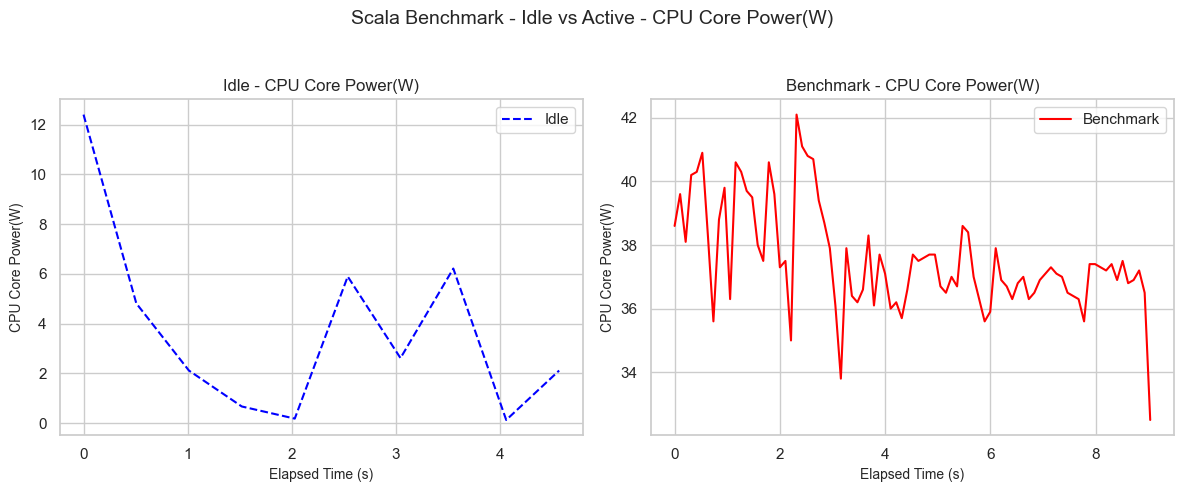

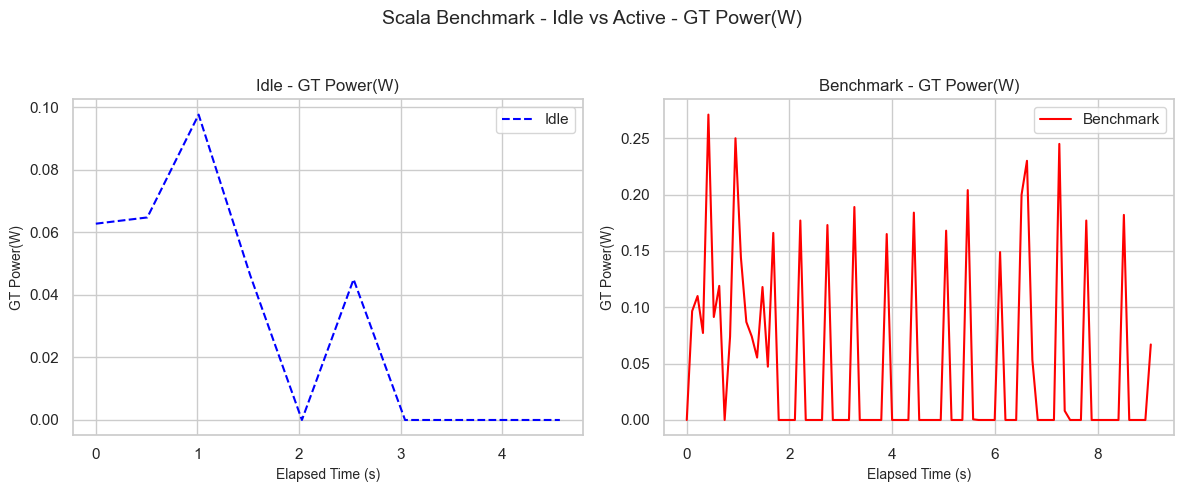

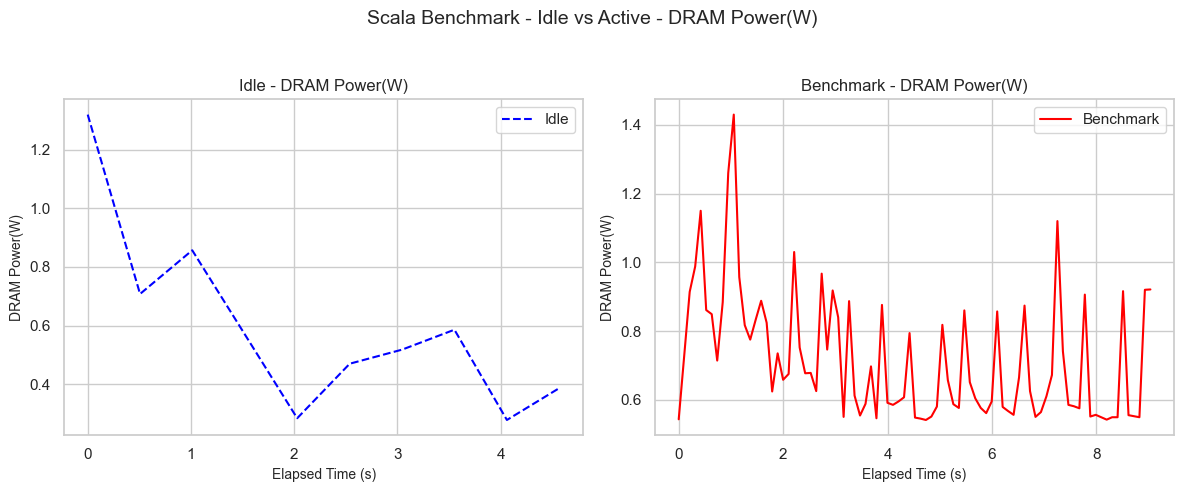

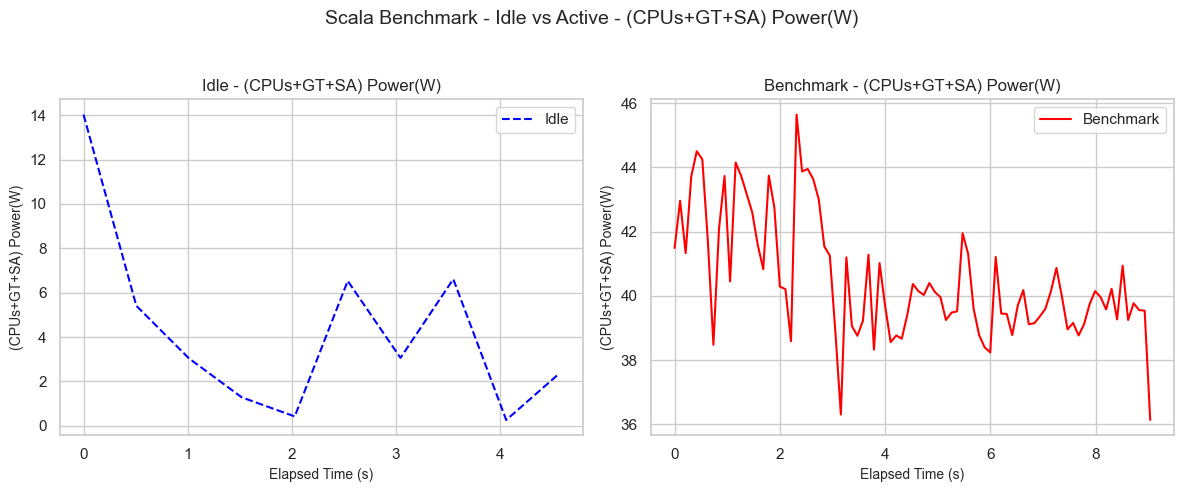

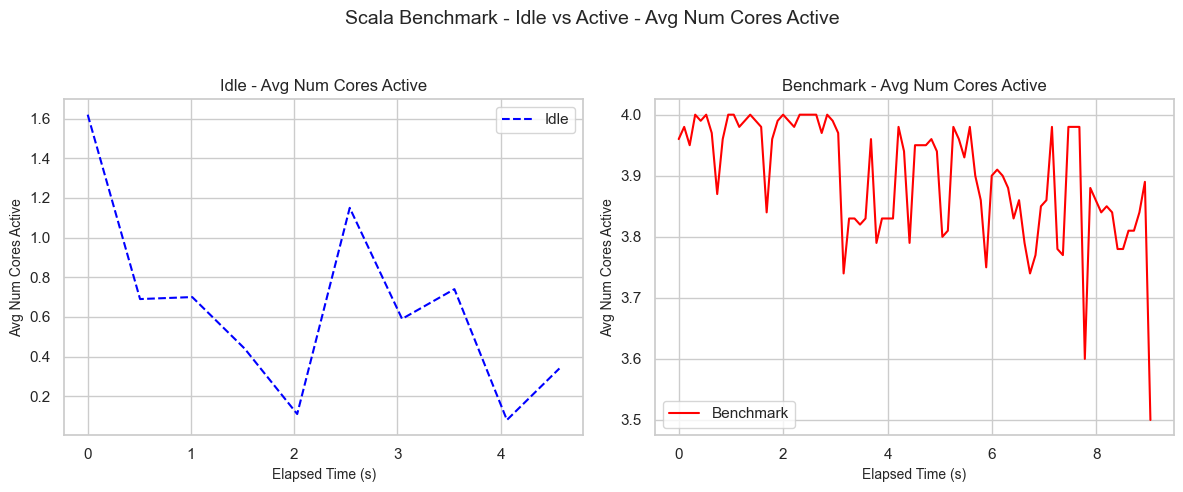

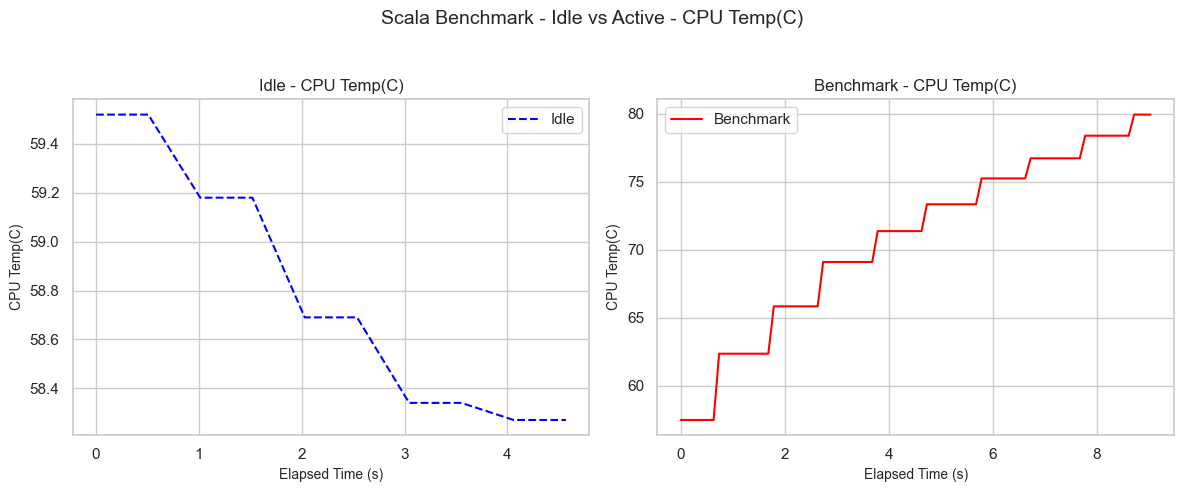

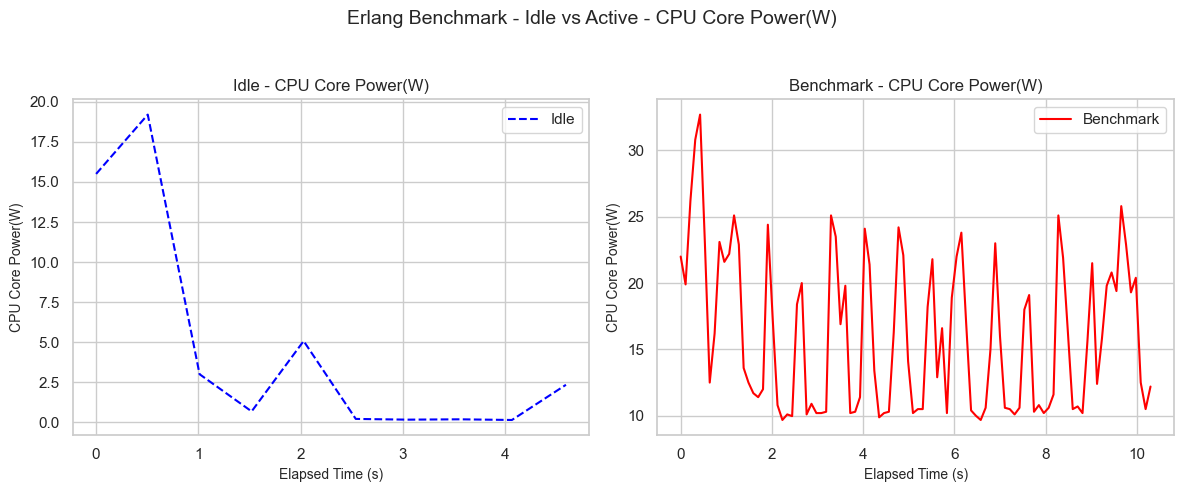

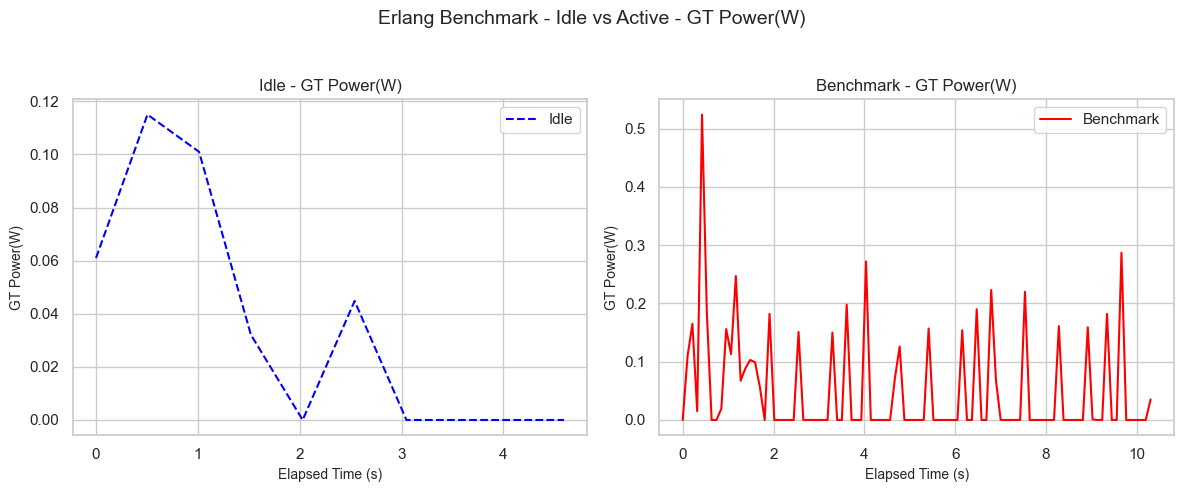

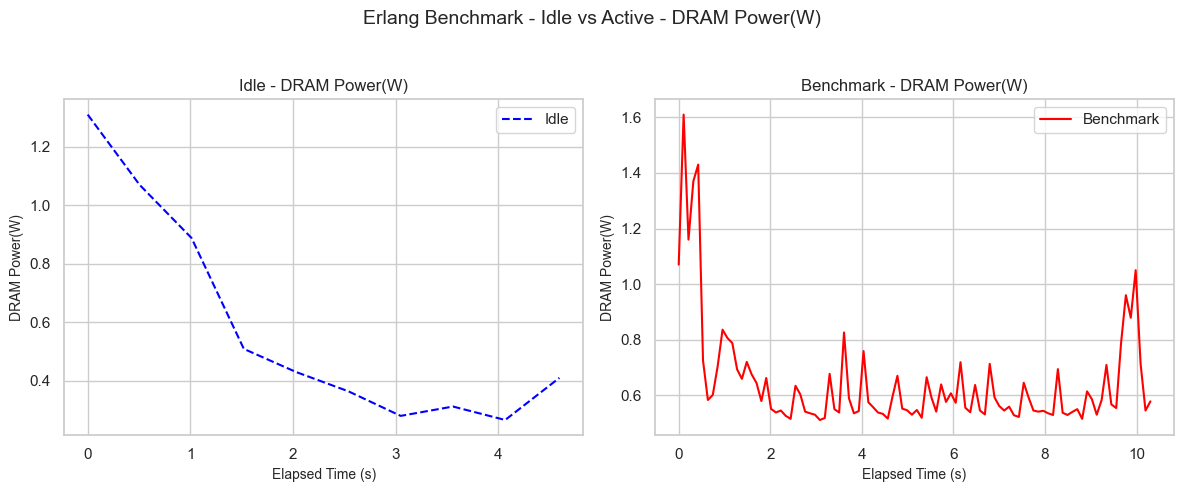

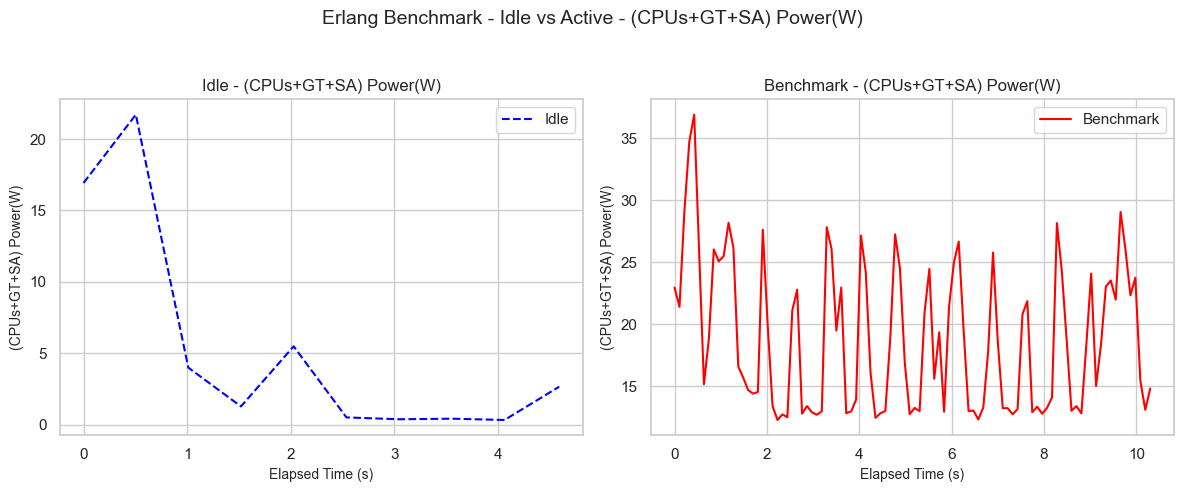

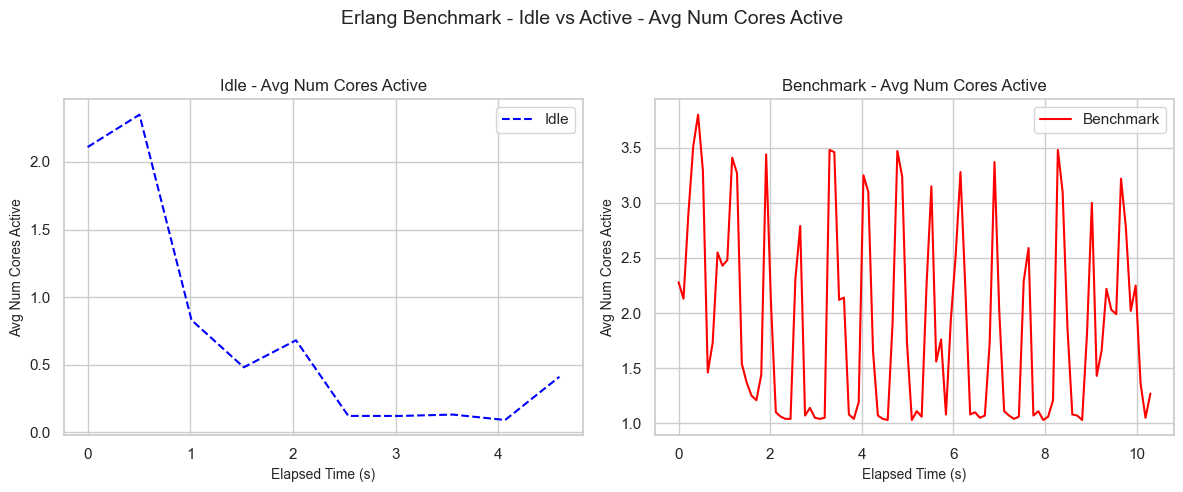

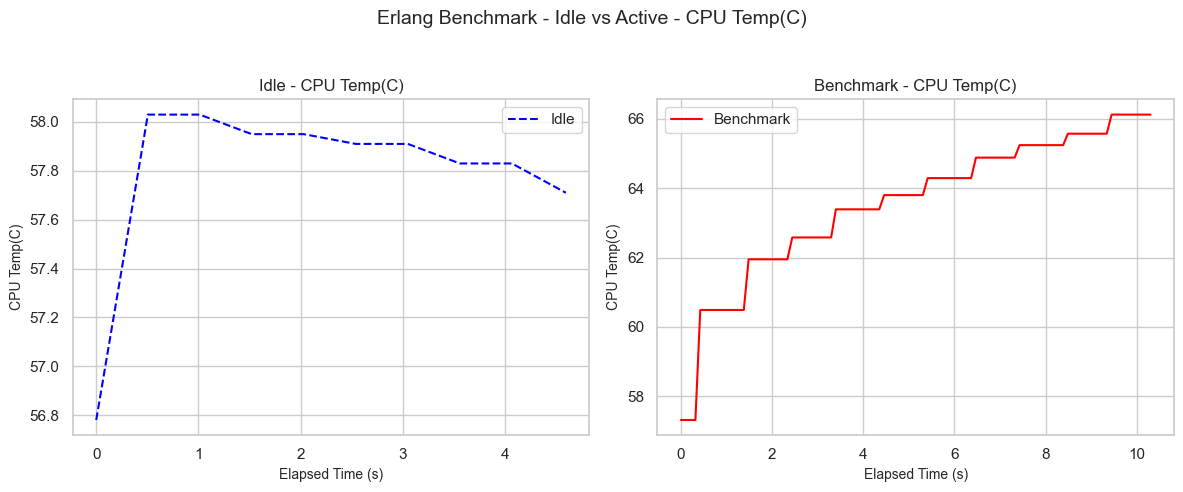

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

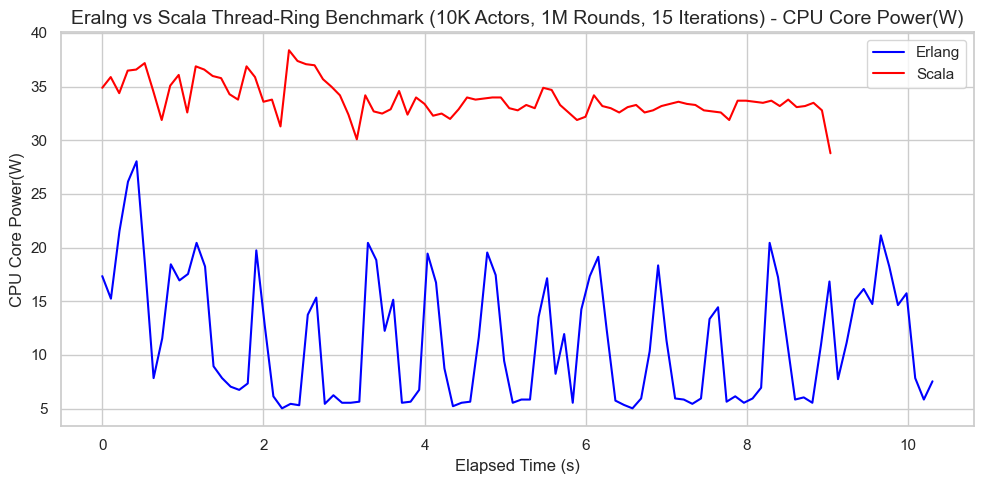

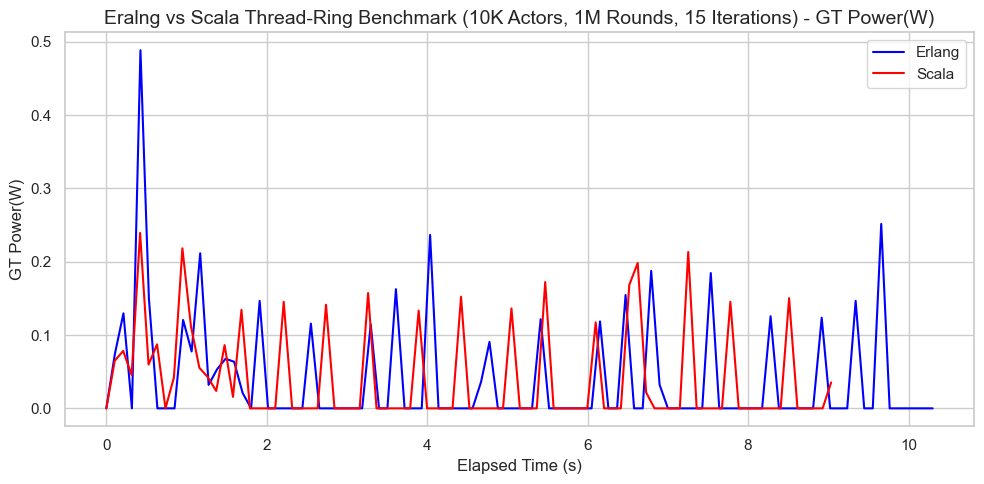

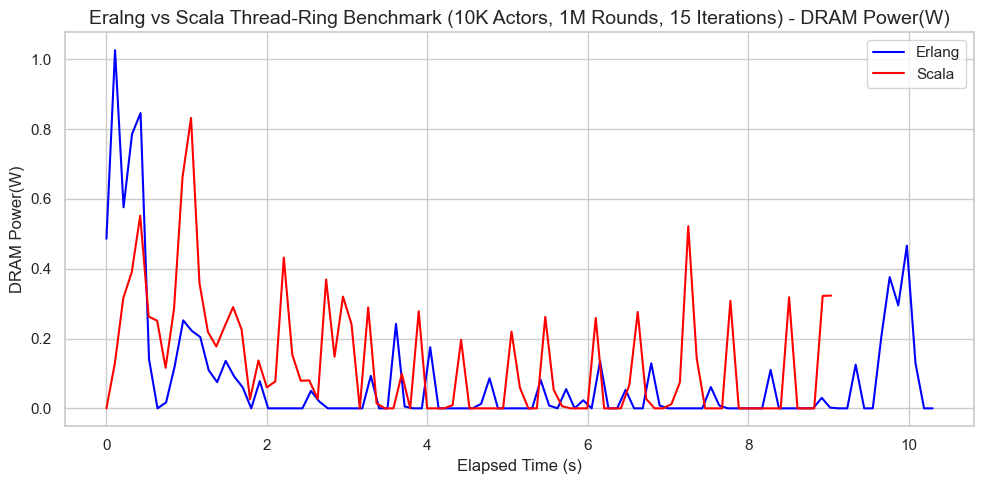

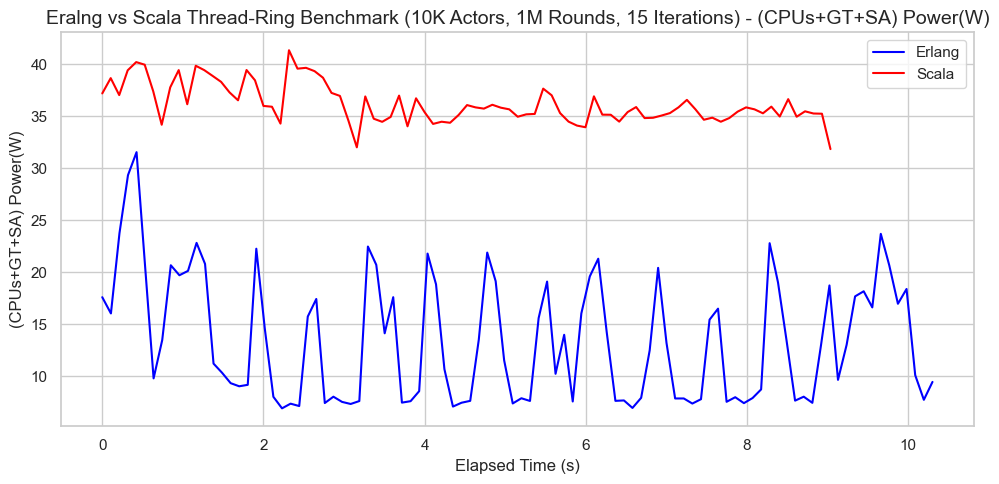

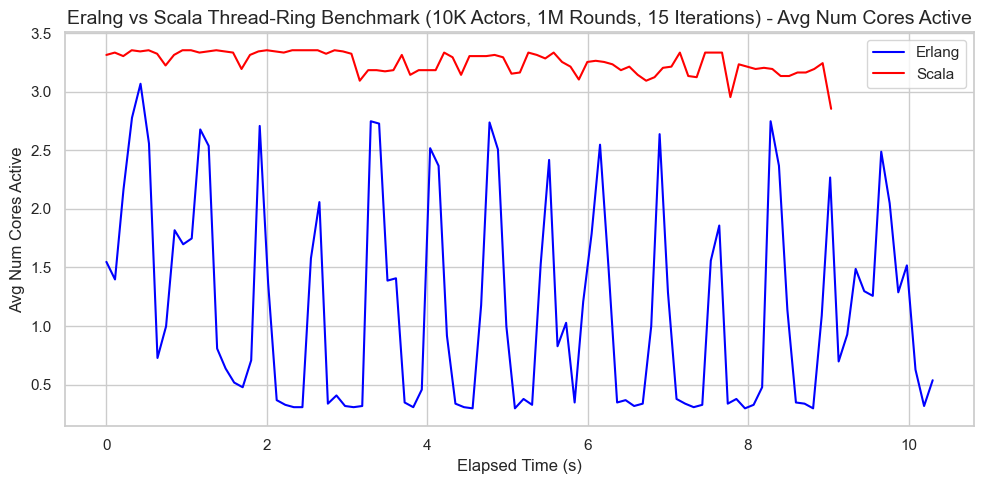

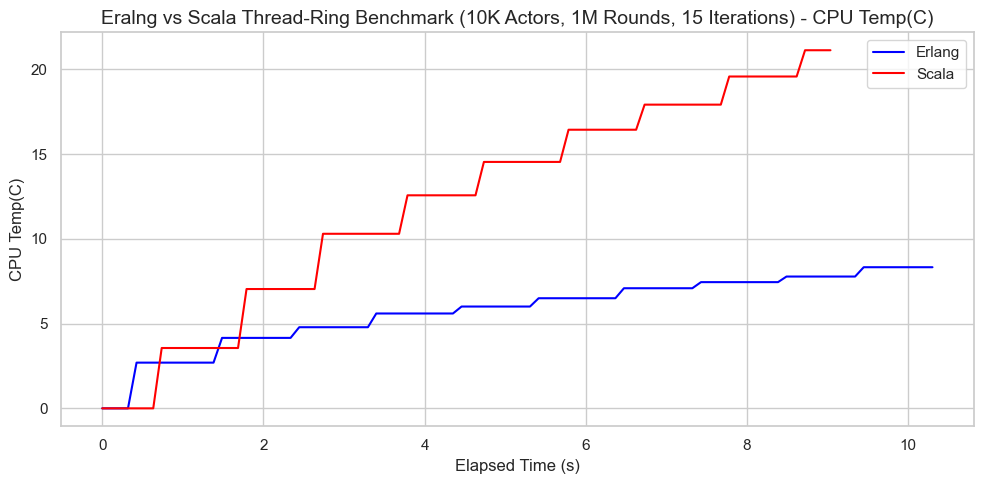

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        33.829830
GT Power(W)               0.018377
DRAM Power(W)             0.119422
(CPUs+GT+SA) Power(W)    36.195713
CPU Temp(C)              11.945057
Avg Num Cores Active      3.251356
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.446804
GT Power(W)               0.014984
DRAM Power(W)             0.061498
(CPUs+GT+SA) Power(W)    13.505551
CPU Temp(C)               5.752714
Avg Num Cores Active      1.176776
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 330.96997684252875 Joules
Erlang Benchmark: 140.60818245061228 Joules
